Import Library



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

Load Dataset

In [ ]:
#Load dataset iris dari scikit-learn library
iris = datasets.load_iris()

x = iris.data    # inputan untuk machine learning
y = iris.target  # output yang dinginkan dari machine learning

#Mengonversi data fitur dan target menjadi DataFrame
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_y = pd.Series(y, name='target')

In [ ]:
#Menampilkan Statistik Deskriptif data
df_x.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Pre-Processing Data**

Cek Missing Value




In [ ]:
# Cek missing value
missing_values = df_x.isnull().sum()
# Menampilkan jumlah missing values per kolom
print(missing_values)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
0


In [ ]:
# Cek missing value
missing_values2 = df_y.isnull().sum()
# Menampilkan jumlah missing values per kolom
print(missing_values2)

0


Cek Duplikasi Data

In [ ]:
# Misalnya df adalah DataFrame yang ingin Anda cek
duplicates = df_x.duplicated()

# Menampilkan baris-baris yang duplikat
print(df_x[duplicates])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
142                5.8               2.7                5.1               1.9


In [ ]:
# Menghitung jumlah duplikat
num_duplicates = df_x.duplicated().sum()
print(f"Jumlah baris duplikat: {num_duplicates}")

Jumlah baris duplikat: 1


In [ ]:
#Mengecek keseimbangan kelas
df_y.value_counts()

,count
target,
0,50
1,50
2,50


Ada 1 duplikat pada data. Dilakukan pengecekan keseimbangan kelas, didapatkan kelas telah seimbang. Oleh karena itu, kita tidak boleh menghapus data tersebut karena akan menyebabkan ketidakseimbangan pada data

2. Membagi data menjadi training dan testing

In [ ]:
# Membagi data menjadi training dan testing (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan testing
print(f"Ukuran data training: {x_train.shape}")
print(f"Ukuran data testing: {x_test.shape}")

Ukuran data training: (120, 4)
Ukuran data testing: (30, 4)


3. Pemodelan menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model menggunakan data training
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Membuat prediksi pada data testing
y_pred = rf_model.predict(x_test)


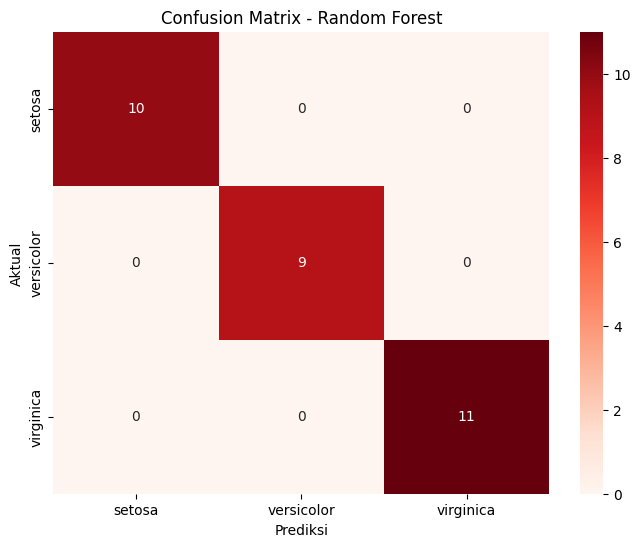

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()